> # **Simple Linear Regression**
> - Simple Linear Regression is a statistical method that allows us to summarize and study relationships between two (quantitative) variables.
<br><br>
> - Assumptions: SLR assumes that there is a linear relationship between X and Y, meaning Y can be expressed as a linear combination of X with some noise or error
<br><br>
> - Equation of the Line : `y = (m * x) + b`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = load_diabetes(as_frame = True)
df = dataset['data'].loc[:, ['s1',	's2', 's3', 's4', 's5']]
df['target'] = dataset['target']
df.head()

,s1,s2,s3,s4,s5,target
0,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,151.0
1,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,75.0
2,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,141.0
3,0.012191,0.024991,-0.036038,0.034309,0.022688,206.0
4,0.003935,0.015596,0.008142,-0.002592,-0.031988,135.0


In [3]:
X = np.array(df.loc[:,'s5']).reshape(-1, 1)
y = np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

> # **LinearRegression - sklearn class**
> `Hyperparameters` - 
> - fit_intercept : If set to False, no intercept will be used in calculations
> - n_jobs : no. of CPU cores
> - copy_X : If True, X will be copied; else, it may be overwritten.
> - positive : When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [5]:
lr = LinearRegression(fit_intercept = True, n_jobs = 5, copy_X = False, positive = False)
lr.fit(X_train, y_train)

LinearRegression(copy_X=False, n_jobs=5)

In [6]:
print(lr.coef_)
print(lr.intercept_)

[945.61313607]
150.73681754198003


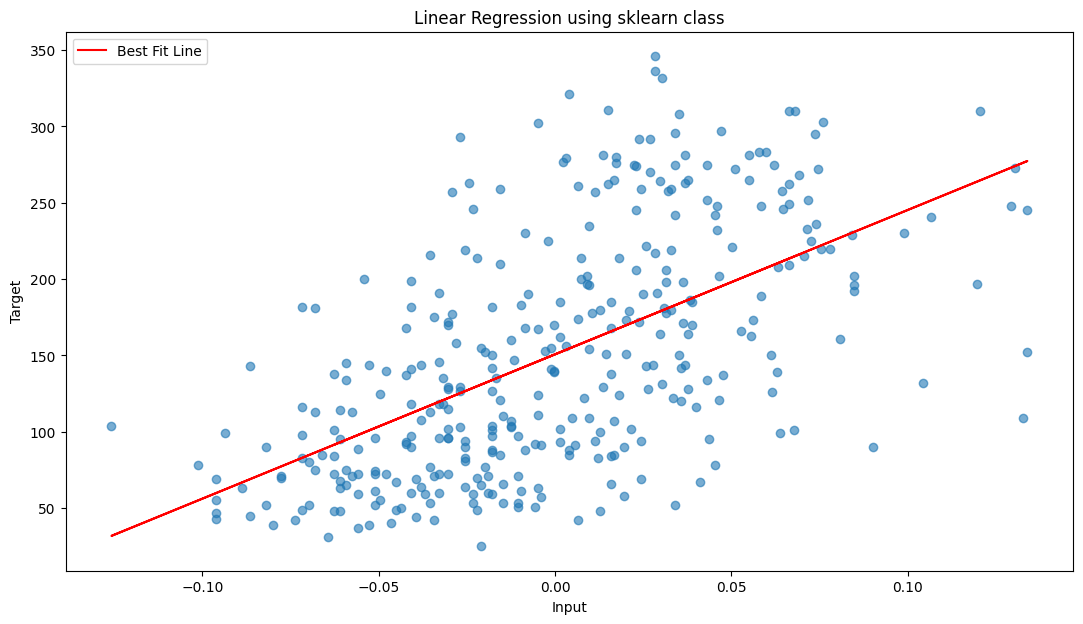

In [7]:
plt.figure(figsize = (13,7))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.plot(X_train, lr.coef_[0] * X_train + lr.intercept_, color = 'red', label = 'Best Fit Line')
plt.legend(loc = 'upper left')
plt.title("Linear Regression using sklearn class")
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [8]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.22527786743609446

<hr>

> # **Creating LinearRegression Class**
> 🚧 We cannot directly canclue out `(X_train - X_train.mean())` from the equation of `((X_train - X_train.mean()) * (y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()` because the devision before multiplication will lead to wrong values of `m`

In [9]:
class LinearRegression:
    def __init__(self) -> None:
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_train = X_train.ravel()
        # slope(m) calculation - OLS
        self.m = ((X_train - X_train.mean()) * (y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()

        # y-intercept(b) calculation - OLS
        self.b = y_train.mean() - (self.m * X_train.mean())

    def predict(self, X_test):
        predicted_values = (self.m * X_test) + self.b
        return predicted_values

In [11]:
slr = LinearRegression()
slr.fit(X_train, y_train)

In [12]:
print(slr.m)
print(slr.b)

945.6131360690342
150.45892351274787


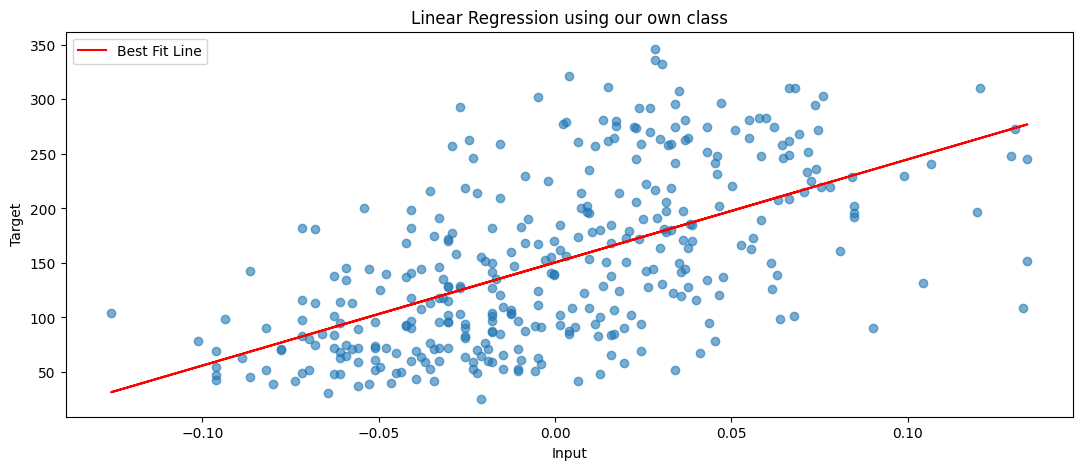

In [13]:
plt.figure(figsize = (13,5))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.plot(X_train, slr.m * X_train + slr.b, color = 'red', label = 'Best Fit Line')
plt.legend(loc = 'upper left')
plt.title("Linear Regression using our own class")
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [14]:
y_pred = slr.predict(X_test)

<hr>

> # **Regression Metrics**
> - mean_absolute_error
> - mean_squared_error
> - root_mean_squared_error
> - r2_score
> - adjusted_r2_score = 1 - [(1 - r2_score) * (n - 1) / (n - 1 - k)] where (n = no.rows, k = no. input columns)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (((1 - r2) * (y_test.shape[0] - 1)) / (y_test.shape[0] - 1 - 1))

print(mae, mse, rmse, r2, adj_r2, sep = '\n')

53.71962384600614
4284.398362580762
65.45531577023185
0.22456615766413313
0.2156531249936059


---

> 🚧 R2-Score is sensitive to `outliers` and can be artifically infected by adding more number of features which are irrevelent for training and prediction.

> 🚧 Why to check `adjusted r2 score` along with `r2 score` - If the difference between `r2 score` and `adjusted r2 score` is large (adjusted r2 score <= r2) then it may indicate that you are using irrevelent features for traning your model

> 🚧 Why RMSE and MAE are not suitable for optimization using `Gradient Descent`?<br><br>
> 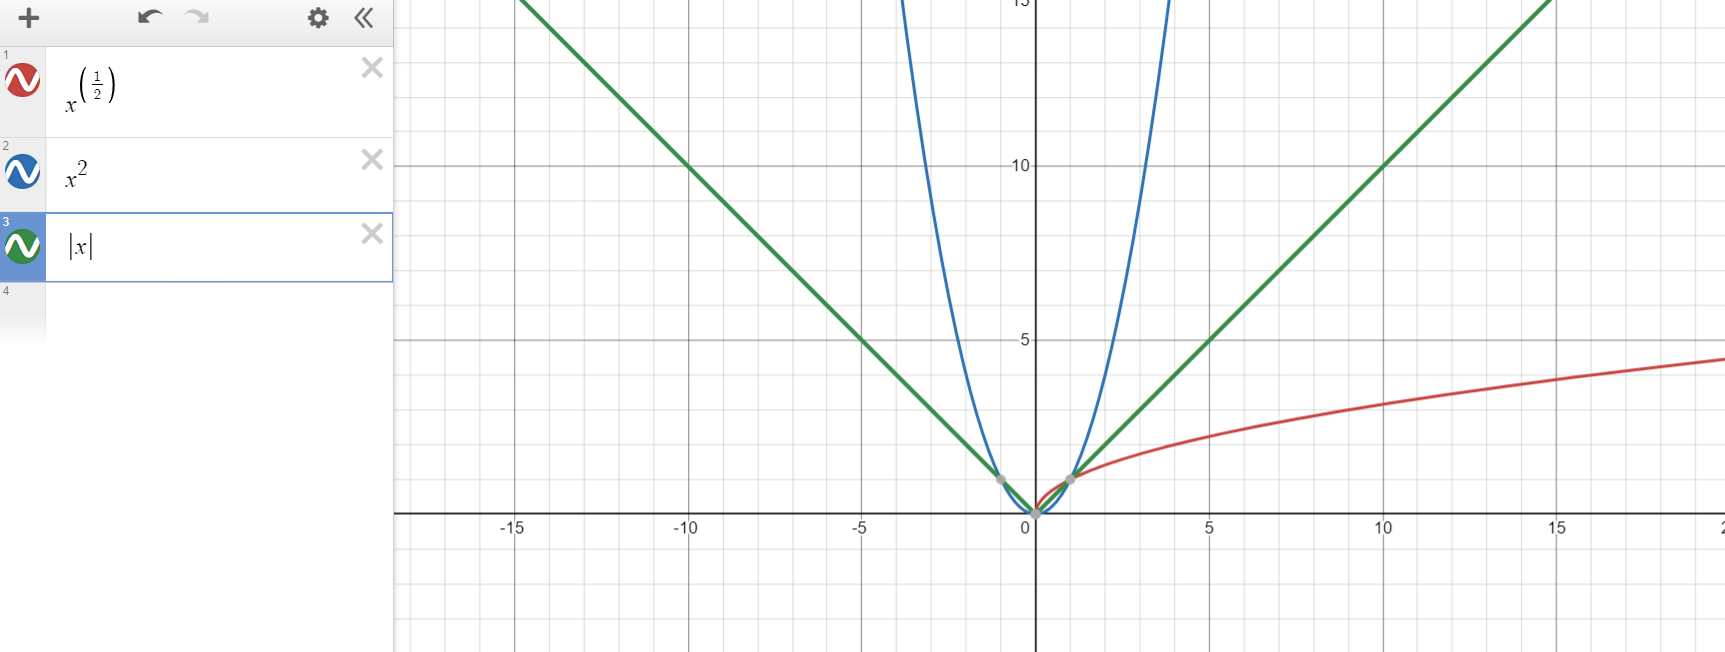<br><br>
> As you can see `RMSE` and `MAE` graphs - RMSE cannot work with -ve values and MSE is Not differentiable at x = 0